### The purpose of this notebook will be to programatically input DCB, capacitive shift measurements, and desired tau values and output the matrix of set elements for each set of tau values
#### This is for the Aug 2020 cooldown, where the big changes are doing capacitive shifts at high bias, and using DCB curves from low AC excitation amplitude

In [1]:
import numpy as np
import holoviews as hv
from scipy import interpolate
from scipy import signal

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
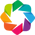

In [2]:
hv.extension('bokeh')

In [3]:
def _calculateQPCShift(sweepVoltages, QPC1, QPC2, numIterations = 10, interpMultiplier = 100):
    """Returns the shift between two offset QPC traces by finding the distance between a horizontal line intersecting the two traces.
    Assumes that for both traces the same voltages were applied
    
    Args:
        sweepVoltages: The voltages applied to the QPC. Must be the same between the two traces.
        
        QPC1: The measured response of the QPC in the first configuration(whether it is a measured voltage or conudctance)
        
        QPC2: The measured response of the QPC in the second configuration.
        
        numIterations: The number of points checked to determine the shift.
        
        interpMultiplier: Interpolation of data done by decreasing spacing of points (increasing rolution) by interpMultiplier
        
    Output:
        voltageSpacing: The shift (in the same units as sweepVoltages) that should be applied to QPC1 to overlap QPC2. 
        (QPC1(sweepVoltages + voltageSpacing) = QPC2(sweepVoltages))"""
    
    #interpolate to give 'extra' resolution in shift
    length = len(sweepVoltages)
    QPC1interp = interpolate.interp1d(sweepVoltages, QPC1, kind = 'cubic')
    QPC2interp = interpolate.interp1d(sweepVoltages, QPC2, kind = 'cubic')
    
    #interpMultiplier*(length-1)+1 is the same as increasing the resolution by interpMultiplier
    QPCinterpVoltages = np.linspace(sweepVoltages[0], sweepVoltages[-1], interpMultiplier*(length-1)+1)

    voltageSpacing = []
    
    #Find shift at multiple points and average
    for i in range(numIterations+2):
        #Do +2 iterations so that can do numIterations without using the 0th or 100th percentile (which would give weird result if at a plateau)
        perc = 100*(i)/(numIterations+1)
        if i==0 or i==(numIterations+1):
            continue
        horizline = np.zeros(interpMultiplier*(length-1)+1) + np.percentile(QPC1, perc)
        
        idx1 = np.argwhere(np.diff(np.sign(horizline-QPC1interp(QPCinterpVoltages)))).flatten()
        idx2 = np.argwhere(np.diff(np.sign(horizline-QPC2interp(QPCinterpVoltages)))).flatten()
        #if 1 == 1:
            #return hv.Curve(horizline)*hv.Curve(QPC1interp(QPCinterpVoltages))*hv.Curve(QPC2interp(QPCinterpVoltages))

        if idx1.size == 0 or idx2.size == 0:
            continue
        idxSpacing = np.mean(idx2) - np.mean(idx1) #Take mean in case intersection at multiple points (due to small noise fluctations)
        voltageSpacing.append((sweepVoltages[1]-sweepVoltages[0])*idxSpacing/interpMultiplier) #convert back to voltage

    return np.mean(voltageSpacing)

In [4]:
def calculateQPCShift(capacitiveShiftData):
    """Returns the shift one one QPC per mV change of another QPC. 
    Takes two QPC traces finds the distance between a horizontal line intersecting the two traces.
    Assumes that for both traces the same voltages were applied
    
    Args:
        capacitiveShiftData: The Holoviews Dataset with QPC of interest as first axis, 
            and the QPC which is varied to see its effect on the first on the second axi
        
    Output:
        voltageSpacing: The shift (in the same units as sweepVoltages) that should be applied to QPC1 to overlap QPC2. 
        (QPC1(sweepVoltages + voltageSpacing) = QPC2(sweepVoltages))"""
    
    dskeys = list(capacitiveShiftData.data.keys())
    capacQPCkey = dskeys[1]
    measuredQPCkey = dskeys[0]
    measurementkey = dskeys[2]
    
    capacQPCfirst = capacitiveShiftData.data[capacQPCkey][0]
    capacQPCsecond = capacitiveShiftData.data[capacQPCkey][1]
    
    measuredQPCVoltages = capacitiveShiftData.data[measuredQPCkey]
    
    measuredValuesfirst = capacitiveShiftData.data[measurementkey][0]
    measuredValuessecond = capacitiveShiftData.data[measurementkey][1]
    
    voltageShift = _calculateQPCShift(measuredQPCVoltages, measuredValuesfirst, measuredValuessecond)
    
    return voltageShift/(capacQPCsecond-capacQPCfirst)
    

In [5]:
def convertDCB(DCBDataset, biasValue = 1500, offset = 0):
    """Takes the 2D measurement from Igor with bias being swept on slow axis, 
    and QPC on the other and returns the measured value at biasValue
    
    Args:
        DCBDataset: Holoviews dataset defined from Igor output of DCB measurement
        
        biasValue: The high bias value to take the cut at (where we define the 'intrinsic' tau)
        
        offset: The bias value corresponding to true zero bias"""
    for dim in DCBDataset.kdims:
        if dim.name != 'Bias':
            QPCname = dim.name
    QPC = DCBDataset.data[QPCname]
    highBiasValues = np.empty(len(QPC))
    for n in range(len(QPC)):
        posDict = {QPCname:QPC[n], 'Bias':biasValue + offset}
        negDict = {QPCname:QPC[n], 'Bias':-1*biasValue + offset}
        highBiasValues[n] = (DCBDataset.select(**posDict) + DCBDataset.select(**negDict)) *.5
    return QPC, highBiasValues

In [6]:
def convertDCBRange(DCBDataset, biasEndpoints, offset = 0):
    """Takes the 2D measurement from Igor with bias being swept on slow axis, 
    and QPC on the other and returns the measured value at biasValue
    
    Args:
        DCBDataset: Holoviews dataset defined from Igor output of DCB measurement
        
        biasEndpoints: An array where the first point is the start and second point is the end of where
            to take the cut at (where we define the 'intrinisc' tau). Enter both positive numbers, ie [300, 400] will
            take the average from -300 to -400 and 300 to 400
        
        offset: The bias value corresponding to true zero bias"""
    for dim in DCBDataset.kdims:
        if dim.name != 'Bias':
            QPCname = dim.name
    QPC = DCBDataset.data[QPCname]
    biasSetPoints = DCBDataset.data['Bias']
    idxPos = np.where((biasSetPoints >= (biasEndpoints[0]+ offset)) & (biasSetPoints <= biasEndpoints[1]+ offset))
    idxNeg = np.where((biasSetPoints >= (-biasEndpoints[1]+ offset)) & (biasSetPoints <= -biasEndpoints[0]+ offset))
   

    
    highBiasValues = np.empty(len(QPC))
    for n in range(len(QPC)):
        posDict = {QPCname:QPC[n], 'Bias': list(biasSetPoints[idxPos])}
        negDict = {QPCname:QPC[n], 'Bias': list(biasSetPoints[idxNeg])}
        dsPos = DCBDataset.select(**posDict)
        dsNeg = DCBDataset.select(**negDict)
        highBiasValues[n] = .5*(np.mean(dsPos['Vref'].flatten()) + np.mean(dsNeg['Vref'].flatten()))
    return QPC, highBiasValues

In [7]:
def convertG(MeasuredVoltages, t0Voltage, t1Voltage):# tOther =1):
    #Input the measured (reflected) voltages, the measured voltage when Gseries =0 and when Gseries=.5
    Gseries = 1.0/(2) * (MeasuredVoltages-t0Voltage)/(t1Voltage-t0Voltage)
    return Gseries

def GQPC(MeasuredVoltages, t0Voltage, t1Voltage, tOther =1):
    #Input the measured (reflected) voltages, the measured voltage when fully closed, open to tau=1, and the tau value the other QPC is set at
    Gseries = convertG(MeasuredVoltages, t0Voltage, t1Voltage)#, tOther)
    
    Gqpc = Gseries/(1 - Gseries/tOther)
    return Gqpc

In [8]:
def convertG2(MeasuredVoltages, t0Voltage, t1Voltage, tOther =1):
    #Input the measured (reflected) voltages, the measured voltage when Gseries =0 and when Gseries=.5
    Gseries = (1.0/(1/tOther + 1)) * (MeasuredVoltages-t0Voltage)/(t1Voltage-t0Voltage)
    return Gseries

def GQPC2(MeasuredVoltages, t0Voltage, t1Voltage, tOther =1):
    #Input the measured (reflected) voltages, the measured voltage when fully closed, open to tau=1, and the tau value the other QPC is set at
    Gseries = convertG2(MeasuredVoltages, t0Voltage, t1Voltage, tOther)
    
    Gqpc = Gseries/(1 - Gseries/tOther)
    return Gqpc

In [9]:
def DCBInterp(DCBds, biasRange, trueZeroBias, t0voltage, t1voltage, tOther =1):
    """Returns an interpolated version of the intrinsic transmission of 
    a QPC by taking averaging over the given biasRange of a DCB measurement
    
    Args:
        DCBds: Holoviews dataset containing DCB data
        
        biasRange: An array where the first element is the lower bound and the 
            second element is the upper bound of the bias range to average over. 
            Note that the negative values of these will also be averaged over.
        
        trueZeroBias: The offset in bias that defines where the true zero bias is. 
            Usually due to offset voltage of amplifiers.
            
        t0voltage: The reflected voltage value when a QPC is fully closed.
        
        t1voltage: The reflected voltage value when a QPC is fully open in series with another QPC that is fully open.
        
    Returns:
        QPCvaluesinterp: The voltage values used in the interpolation. 
            A linear interpolation of 10,000 points between the first and last points used in the DCB measurement.
            
        QPCinterp(QPCvaluesinterp): The conductance values at each of QPCvaluesinterp points.
        
    """

    QPCvalues, QPChb = convertDCBRange(DCBds,biasRange, offset= trueZeroBias )

    #Convert voltage to QPC conductance
    QPCG = GQPC(QPChb, t0voltage, t1voltage, tOther)

    #Interpolate to get better sense of what voltage to apply for specific tau (ie .95 might not be capture in original data set)
    QPCinterp = interpolate.interp1d(QPCvalues, QPCG, kind = 'cubic')

    QPCvaluesinterp = np.linspace(QPCvalues[0], QPCvalues[-1], 10000)

    return QPCvaluesinterp, QPCinterp(QPCvaluesinterp)

In [10]:
def DCBInterp2(DCBds, biasRange, trueZeroBias, t0voltage, t1voltage, tOther =1):
    """Returns an interpolated version of the intrinsic transmission of 
    a QPC by taking averaging over the given biasRange of a DCB measurement
    
    Args:
        DCBds: Holoviews dataset containing DCB data
        
        biasRange: An array where the first element is the lower bound and the 
            second element is the upper bound of the bias range to average over. 
            Note that the negative values of these will also be averaged over.
        
        trueZeroBias: The offset in bias that defines where the true zero bias is. 
            Usually due to offset voltage of amplifiers.
            
        t0voltage: The reflected voltage value when a QPC is fully closed.
        
        t1voltage: The reflected voltage value when a QPC is fully open in series with another QPC that is fully open.
        
    Returns:
        QPCvaluesinterp: The voltage values used in the interpolation. 
            A linear interpolation of 10,000 points between the first and last points used in the DCB measurement.
            
        QPCinterp(QPCvaluesinterp): The conductance values at each of QPCvaluesinterp points.
        
    """

    QPCvalues, QPChb = convertDCBRange(DCBds,biasRange, offset= trueZeroBias )

    #Convert voltage to QPC conductance
    QPCG = GQPC2(QPChb, t0voltage, t1voltage, tOther)

    #Interpolate to get better sense of what voltage to apply for specific tau (ie .95 might not be capture in original data set)
    QPCinterp = interpolate.interp1d(QPCvalues, QPCG, kind = 'cubic')

    QPCvaluesinterp = np.linspace(QPCvalues[0], QPCvalues[-1], 10000)

    return QPCvaluesinterp, QPCinterp(QPCvaluesinterp)

In [11]:
def find_nearest(array, value):
    array = np.asarray(array)
    value = np.asarray(value)
    idx = (np.abs(np.tile(array, (len(value), 1)) - value[:,None])).argmin(1)
    return idx

def find_nearest2(array, values):
    array = np.broadcast_to(array, (len(values), len(array)))
    changes = (np.diff(np.sign(array-np.array([values]).T)) !=0)*1
    rows, cols = np.where(changes == 1)
    _, indices = np.unique(rows, return_index = True)
    idx = cols[indices]
    return idx
array = np.random.random(10)
print(array)
# [ 0.21069679  0.61290182  0.63425412  0.84635244  0.91599191  0.00213826
#   0.17104965  0.56874386  0.57319379  0.28719469]

value = np.array([0.5, .1])

print(find_nearest2(array, value))

[0.3033673  0.26992551 0.84526368 0.7928058  0.12478403 0.50916017
 0.44442346 0.0681463  0.81640019 0.3118407 ]
[1 6]


In [12]:
def SetVoltages(EffectiveVoltages, ReferenceVoltages, CapacitanceMatrix):
    """Returns the matrix of voltages to set all the QPCs at given the following.
    
    Args:
        EffectiveVoltages: The voltages that a given QPC would be set at for the desired tau when all other QPCs are at ReferenceVoltages
        
        ReferenceVoltages: The voltages that all other QPCs were at when a given QPC_i was swept in a DCB measurement to find tau_i
        
        CapacitanceMatrix: The matrix which contains the capacitive shift coefficients. The format is that Cij is the shift on QPC_i caused by changes in QPC_j
    """
    #print(np.linalg.inv(np.identity(CapacitanceMatrix.ndim)+CapacitanceMatrix))
    #print(EffectiveVoltages+np.einsum('ij,ji->i', CapacitanceMatrix,ReferenceVoltages)[:, None])
    return np.matmul(np.linalg.inv(np.identity(CapacitanceMatrix.shape[0])+CapacitanceMatrix),
                     (EffectiveVoltages+np.einsum('ij,ji->i', CapacitanceMatrix,ReferenceVoltages)[:, None]))
    

## 0uW

### Capacitive Shifts

In [13]:
#Capacitive Shift Data for '12'

#e35414 = np.loadtxt('e35414.txt')
QPC5_12 = np.loadtxt('e36271.txt')
QPC5_12ds = hv.Dataset((np.linspace(-390, -380, 91),np.linspace(-250, -200, 2),  QPC5_12), ['QPC12', 'QPC5'], 'Vref')
QPC0_12 = np.loadtxt('e36272.txt')
QPC0_12ds = hv.Dataset((np.linspace(-390, -380, 91), np.linspace(-400, -350, 2), QPC0_12), ['QPC12', 'QPC0'], 'Vref')


QPCcapac5_12 = calculateQPCShift(QPC5_12ds)
QPCcapac0_12 = calculateQPCShift(QPC0_12ds)

print(QPCcapac5_12, QPCcapac0_12)

-0.004790296296295208 -0.008621185185183225


In [14]:
QPC5_12ds.to(hv.Curve, 'QPC12').overlay()

:NdOverlay   [QPC5]
   :Curve   [QPC12]   (Vref)

In [15]:
#Capacitive Shift Data for '5'

QPC12_5 = np.loadtxt('e36273.txt')
QPC12_5ds = hv.Dataset((np.linspace(-350, -340, 91),np.linspace(-300, -250, 2),  QPC12_5), ['QPC5', 'QPC12'], 'Vref')
QPC12_5 = np.loadtxt('e36295.txt')
QPC12_5ds = hv.Dataset((np.linspace(-350, -330, 181),np.linspace(-300, -250, 3),  QPC12_5), ['QPC5', 'QPC12'], 'Vref')


QPC0_5 = np.loadtxt('e36274.txt')
QPC0_5ds = hv.Dataset((np.linspace(-350, -340, 91), np.linspace(-400, -350, 2), QPC0_5), ['QPC5', 'QPC0'], 'Vref')



QPCcapac12_5 = calculateQPCShift(QPC12_5ds)
QPCcapac0_5 = calculateQPCShift(QPC0_5ds)
print(QPCcapac12_5, QPCcapac0_5)

-0.059756232804219225 -0.003355870370369608


In [16]:
QPC12_5ds.to(hv.Curve, 'QPC5').overlay()

:NdOverlay   [QPC12]
   :Curve   [QPC5]   (Vref)

In [17]:
QPC12_5_2 = np.loadtxt('e36295.txt')
QPC12_5ds2 = hv.Dataset((np.linspace(-350, -330, 181),np.linspace(-300, -250, 3),  QPC12_5_2), ['QPC5', 'QPC12'], 'Vref')
QPC12_5ds2.to(hv.Curve, 'QPC5').overlay()

:NdOverlay   [QPC12]
   :Curve   [QPC5]   (Vref)

In [18]:
calculateQPCShift(QPC12_5ds2)

-0.059756232804219225

In [19]:
test = np.loadtxt('e35944.txt')
test = hv.Dataset((np.linspace(-360, -300, 61),np.linspace(-350, -200, 11),  test), ['QPC5', 'QPC12'], 'Vref')
test.to(hv.Curve, 'QPC5').overlay().options(height =600, width=600)

:NdOverlay   [QPC12]
   :Curve   [QPC5]   (Vref)

In [20]:
#Capacitive Shift Data for '0'
QPC5_0 = np.loadtxt('e36275.txt')
QPC5_0ds = hv.Dataset((np.linspace(-480, -470, 91),np.linspace(-250, -200, 2),  QPC5_0), ['QPC0', 'QPC5'], 'Vref')

QPC12_0 = np.loadtxt('e36276.txt')
QPC12_0ds = hv.Dataset((np.linspace(-480, -470, 91),np.linspace(-300, -250, 2),  QPC12_0), ['QPC0', 'QPC12'], 'Vref')
QPC12_0 = np.loadtxt('e36296.txt')
QPC12_0ds = hv.Dataset((np.linspace(-480, -460, 181),np.linspace(-300, -250, 3),  QPC12_0), ['QPC0', 'QPC12'], 'Vref')


QPCcapac5_0 = calculateQPCShift(QPC5_0ds)
QPCcapac12_0 = calculateQPCShift(QPC12_0ds)


print(QPCcapac5_0, QPCcapac12_0)

-0.0012605925925923047 -0.03290200789173555


In [21]:
QPC12_0ds.to(hv.Curve, 'QPC0').overlay()

:NdOverlay   [QPC12]
   :Curve   [QPC0]   (Vref)

In [22]:
QPC12_0_2 = np.loadtxt('e36296.txt')
QPC12_0ds2 = hv.Dataset((np.linspace(-480, -460, 181),np.linspace(-300, -250, 3),  QPC12_0_2), ['QPC0', 'QPC12'], 'Vref')

In [23]:
QPC12_0ds2.to(hv.Curve, 'QPC0').overlay()

:NdOverlay   [QPC12]
   :Curve   [QPC0]   (Vref)

In [24]:
calculateQPCShift(QPC12_0ds2)

-0.03290200789173555

### Determining Shifts

#### QPC0

In [25]:
t0voltage = 0.0001970983077906287
t1voltage = 0.000166523482870876


#QPC0DCB = np.loadtxt('e34910.txt')
QPC0DCB = np.loadtxt('e35941.txt')
#e34880ds = hv.Dataset((np.linspace(-480, -390, 46), np.linspace(-500, 500,101), e34880), ['QPC0', 'Bias'], 'Vref')
#QPC0dsG= hv.Dataset((np.linspace(-480, -390, 46), np.linspace(-500, 500,101), GQPC2(QPC0DCB, t0voltage, t1voltage, .5)), ['QPC0', 'Bias'], 'G')
QPC0dsG= hv.Curve((np.linspace(-490, -400, 91), GQPC2(QPC0DCB, t0voltage, t1voltage, .5)))

#newQPC0 = np.loadtxt('e34916.txt')
newQPC0 = np.loadtxt('e35941.txt')
shift0 = 0

QPC0dsG*hv.Curve((np.linspace(-490, -400, 91) +shift0, GQPC2(newQPC0, t0voltage, t1voltage, tOther=.5)))

:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Curve.II :Curve   [x]   (y)

In [26]:
np.std(GQPC2(newQPC0, t0voltage, t1voltage, tOther=.5)[40:])

0.010749646959214305

In [27]:
np.std(newQPC0[40:])

1.0997812772481129e-07

In [28]:
newQPC0[40:]

array([0.00016651, 0.00016672, 0.00016631, 0.00016666, 0.00016654,
       0.00016643, 0.00016647, 0.00016659, 0.00016661, 0.00016663,
       0.00016655, 0.00016641, 0.00016657, 0.00016661, 0.00016651,
       0.00016653, 0.00016674, 0.00016667, 0.0001666 , 0.00016673,
       0.0001666 , 0.00016647, 0.00016653, 0.00016642, 0.00016644,
       0.00016649, 0.00016658, 0.00016651, 0.00016657, 0.00016664,
       0.00016678, 0.00016665, 0.00016675, 0.00016651, 0.00016648,
       0.00016648, 0.00016651, 0.00016633, 0.00016654, 0.00016667,
       0.00016669, 0.00016644, 0.00016651, 0.00016669, 0.00016656,
       0.00016643, 0.00016636, 0.00016668, 0.00016658, 0.00016644,
       0.00016645])

In [29]:
newQPC0

array([0.00019697, 0.00019716, 0.00019699, 0.00019697, 0.00019696,
       0.00019695, 0.00019707, 0.00019711, 0.00019705, 0.00019688,
       0.00019623, 0.00019578, 0.0001945 , 0.00019337, 0.00019208,
       0.00019125, 0.000191  , 0.00019033, 0.00018945, 0.00018875,
       0.0001877 , 0.00018632, 0.00018472, 0.00018306, 0.00018156,
       0.00017964, 0.00017767, 0.0001755 , 0.00017372, 0.00017221,
       0.00017066, 0.00016964, 0.00016873, 0.00016812, 0.00016748,
       0.0001669 , 0.00016659, 0.00016673, 0.00016642, 0.00016687,
       0.00016651, 0.00016672, 0.00016631, 0.00016666, 0.00016654,
       0.00016643, 0.00016647, 0.00016659, 0.00016661, 0.00016663,
       0.00016655, 0.00016641, 0.00016657, 0.00016661, 0.00016651,
       0.00016653, 0.00016674, 0.00016667, 0.0001666 , 0.00016673,
       0.0001666 , 0.00016647, 0.00016653, 0.00016642, 0.00016644,
       0.00016649, 0.00016658, 0.00016651, 0.00016657, 0.00016664,
       0.00016678, 0.00016665, 0.00016675, 0.00016651, 0.00016

In [30]:
np.std(newQPC0[:9])

6.875954899341656e-08

In [31]:
np.sqrt(GQPC(180e-6-np.var(newQPC0[40:]), t0voltage, t1voltage, tOther=.5)-GQPC(180e-6, t0voltage, t1voltage, tOther=.5))

3.190772184356154e-05

#### QPC5

In [32]:
t0voltage = 0.0001970983077906287
t1voltage = 0.000166523482870876


#QPC5DCB = np.loadtxt('e34901.txt')
QPC5DCB = np.loadtxt('e35943.txt')
#e34883ds = hv.Dataset((np.linspace(-370, -270, 51), np.linspace(-500, 500,101), e34883), ['QPC5', 'Bias'], 'Vref')
#QPC5dsG = hv.Dataset((np.linspace(-370, -270, 51), np.linspace(-500, 500,101), GQPC2(QPC5DCB, t0voltage, t1voltage, .5)), ['QPC5', 'Bias'], 'G')
QPC5dsG= hv.Curve((np.linspace(-360, -250, 111), GQPC2(QPC5DCB, t0voltage, t1voltage, .5)))

#newQPC5 = np.loadtxt('e34915.txt')
newQPC5 = np.loadtxt('e35943.txt')
shift5 = 0

QPC5dsG*hv.Curve((np.linspace(-360, -250, 111) +shift5, GQPC2(newQPC5, t0voltage, t1voltage, tOther=.5)))

:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Curve.II :Curve   [x]   (y)

#### QPC12

In [33]:
t0voltage = 0.0001972559703376489
t1voltage =0.0001667148428264466


#QPC12DCB = np.loadtxt('e34903.txt')
QPC12DCB = np.loadtxt('e36262.txt')
#e34885ds = hv.Dataset((np.linspace(-470, -390, 41), np.linspace(-500, 500,101), e34885), ['QPC12', 'Bias'], 'Vref')
#QPC12dsG = hv.Dataset((np.linspace(-470, -390, 41), np.linspace(-500, 500,101), GQPC2(QPC12DCB, t0voltage, t1voltage, .5)), ['QPC12', 'Bias'], 'G')
QPC12dsG= hv.Curve((np.linspace(-410, -300, 111), GQPC2(QPC12DCB, t0voltage, t1voltage, .5)))

#newQPC12 = np.loadtxt('e34917.txt')
newQPC12 = np.loadtxt('e36241.txt')
shift12 = 0

QPC12dsG*hv.Curve((np.linspace(-410, -300,111) +shift12, GQPC2(newQPC12, t0voltage, t1voltage, tOther=.5)))

:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Curve.II :Curve   [x]   (y)

### DCB Curves

#### QPC0

In [34]:
t0voltage = 0.0001972559703376489
t1voltage = 0.0001666898499264927


#DCB Measurement for QPC5, QPC0, QPC12. QPC0,5,12 at -250mV when others measured


#QPC0DCB = np.loadtxt('e34910.txt')
#QPC0DCB = np.loadtxt('e35941.txt')
QPC0DCB = np.loadtxt('e36314.txt')
QPCvalues = np.linspace(-490, -400, 91)
QPCG = GQPC2(QPC0DCB, t0voltage, t1voltage, .5)

QPCinterpG = interpolate.interp1d(QPCvalues, QPCG, kind = 'cubic')

QPC0valuesinterp = np.linspace(QPCvalues[0], QPCvalues[-1], 10000)
QPC0interpG = QPCinterpG(QPC0valuesinterp)

QPC0interpG = signal.savgol_filter(QPC0interpG, 1511, 3) 

hv.Curve((QPC0valuesinterp, QPC0interpG))#*hv.Curve((QPC0valuesinterp, QPC0interpGzb))

:Curve   [x]   (y)

In [35]:
QPC0Taus = QPC0interpG[find_nearest(QPC0interpG, np.array([.2, .9]))]
QPC0Taus

array([0.19988239, 0.89993064])

#### QPC5

In [36]:
t0voltage = 0.0001972559703376489
t1voltage = 0.0001666898499264927


QPC5DCB = np.loadtxt('e36313.txt')
QPCvalues = np.linspace(-360, -250, 111)
QPCG = GQPC2(QPC5DCB, t0voltage, t1voltage, .5)

QPCinterpG = interpolate.interp1d(QPCvalues, QPCG, kind = 'cubic')

QPC5valuesinterp = np.linspace(QPCvalues[0], QPCvalues[-1], 10000)
QPC5interpG = QPCinterpG(QPC5valuesinterp)

QPC5interpG = signal.savgol_filter(QPC5interpG, 1511, 3) 

hv.Curve((QPC5valuesinterp, QPC5interpG))#*hv.Curve((QPC0valuesinterp, QPC0interpGzb))

:Curve   [x]   (y)

#### QPC12

In [37]:
t0voltage = 0.0001972559703376489
t1voltage = 0.0001666898499264927


QPC12DCB = np.loadtxt('e36315.txt')
QPCvalues = np.linspace(-410, -300, 111)
QPCG = GQPC2(QPC12DCB, t0voltage, t1voltage, .5)

QPCinterpG = interpolate.interp1d(QPCvalues, QPCG, kind = 'cubic')

QPC12valuesinterp = np.linspace(QPCvalues[0], QPCvalues[-1], 10000)
QPC12interpG = QPCinterpG(QPC12valuesinterp)

QPC12interpG = signal.savgol_filter(QPC12interpG, 1511, 3) 

hv.Curve((QPC12valuesinterp, QPC12interpG))#*hv.Curve((QPC0valuesinterp, QPC0interpGzb))

:Curve   [x]   (y)

### Determining Set Voltages

In [43]:
#Turn the desired taus into the effective voltages based off the DCB measurements
QPC0Taustest = np.array([0.58])
QPC5Taustest = np.array([0.58])

#Step from .76 to .92 and repeat 8 times
QPC12Taus = np.tile(np.linspace(.76, .92, 9), 8)

QPC0EffectiveVoltagestest = QPC0valuesinterp[find_nearest2(QPC0interpG, QPC0Taustest)]
QPC5EffectiveVoltagestest = QPC5valuesinterp[find_nearest2(QPC5interpG, QPC5Taustest)]
QPC12EffectiveVoltagestest= QPC12valuesinterp[find_nearest2(QPC12interpG, QPC12Taus)]
#QPC12EffectiveVoltagestest= np.tile(np.append(QPC12valuesinterp[find_nearest2(QPC12interpG, QPC12Taus)], []), 4)
#QPC12EffectiveVoltagestest= np.tile(QPC12valuesinterp[find_nearest2(QPC12interpG, QPC12Taus)], 6)
print(QPC0EffectiveVoltagestest, QPC5EffectiveVoltagestest, QPC12EffectiveVoltagestest)

[-468.07380738] [-328.92189219] [-375.35753575 -374.92849285 -374.45544554 -373.93839384 -373.36633663
 -372.75027503 -372.09020902 -371.32013201 -370.3850385  -375.35753575
 -374.92849285 -374.45544554 -373.93839384 -373.36633663 -372.75027503
 -372.09020902 -371.32013201 -370.3850385  -375.35753575 -374.92849285
 -374.45544554 -373.93839384 -373.36633663 -372.75027503 -372.09020902
 -371.32013201 -370.3850385  -375.35753575 -374.92849285 -374.45544554
 -373.93839384 -373.36633663 -372.75027503 -372.09020902 -371.32013201
 -370.3850385  -375.35753575 -374.92849285 -374.45544554 -373.93839384
 -373.36633663 -372.75027503 -372.09020902 -371.32013201 -370.3850385
 -375.35753575 -374.92849285 -374.45544554 -373.93839384 -373.36633663
 -372.75027503 -372.09020902 -371.32013201 -370.3850385  -375.35753575
 -374.92849285 -374.45544554 -373.93839384 -373.36633663 -372.75027503
 -372.09020902 -371.32013201 -370.3850385  -375.35753575 -374.92849285
 -374.45544554 -373.93839384 -373.36633663 -37

In [40]:
print(QPCcapac12_5*1.45)

-0.08664653756611787


In [41]:
#Define voltage reference matrix to make capacitive corrections
R2IK = np.array([[0,-400, -400],
                 [-250,0,-250],
                 [-300, -300, 0]])
C2IK = np.array([[0,-QPCcapac5_0, -QPCcapac12_0], #shift of QPC1 due to other QPCs
                 [-QPCcapac0_5,0, -QPCcapac12_5], #shift of QPC5 due to other QPCs
                 [-QPCcapac0_12, -QPCcapac5_12, 0]]) #shift of QPC12 due to other QPCs

E2IKtest = np.zeros((2, len(QPC12EffectiveVoltagestest))) + np.array([QPC0EffectiveVoltagestest, QPC5EffectiveVoltagestest]) #Rows are the effective voltages that we want
E2IKtest = np.vstack([E2IKtest, QPC12EffectiveVoltagestest])

SetVoltages2IKtest = SetVoltages(E2IKtest, R2IK, C2IK) #Convert Effective voltages into what voltages to set
print(SetVoltages2IKtest)

[[-465.78108057 -465.7951727  -465.81071018 -465.827693   -465.8464825
  -465.86671735 -465.88839755 -465.91369111 -465.94440473 -465.78108057
  -465.7951727  -465.81071018 -465.827693   -465.8464825  -465.86671735
  -465.88839755 -465.91369111 -465.94440473 -465.78108057 -465.7951727
  -465.81071018 -465.827693   -465.8464825  -465.86671735 -465.88839755
  -465.91369111 -465.94440473 -465.78108057 -465.7951727  -465.81071018
  -465.827693   -465.8464825  -465.86671735 -465.88839755 -465.91369111
  -465.94440473 -465.78108057 -465.7951727  -465.81071018 -465.827693
  -465.8464825  -465.86671735 -465.88839755 -465.91369111 -465.94440473
  -465.78108057 -465.7951727  -465.81071018 -465.827693   -465.8464825
  -465.86671735 -465.88839755 -465.91369111 -465.94440473 -465.78108057
  -465.7951727  -465.81071018 -465.827693   -465.8464825  -465.86671735
  -465.88839755 -465.91369111 -465.94440473 -465.78108057 -465.7951727
  -465.81071018 -465.827693   -465.8464825  -465.86671735 -465.8883975

### Following is what I copy into Igor, formatting is just to make it easier for Igor to understand

In [42]:
','.join(map(str, np.round(SetVoltages2IKtest,2)[1]))

'-324.0,-324.03,-324.06,-324.09,-324.12,-324.16,-324.2,-324.24,-324.3,-324.0,-324.03,-324.06,-324.09,-324.12,-324.16,-324.2,-324.24,-324.3,-324.0,-324.03,-324.06,-324.09,-324.12,-324.16,-324.2,-324.24,-324.3,-324.0,-324.03,-324.06,-324.09,-324.12,-324.16,-324.2,-324.24,-324.3,-324.0,-324.03,-324.06,-324.09,-324.12,-324.16,-324.2,-324.24,-324.3,-324.0,-324.03,-324.06,-324.09,-324.12,-324.16,-324.2,-324.24,-324.3,-324.0,-324.03,-324.06,-324.09,-324.12,-324.16,-324.2,-324.24,-324.3,-324.0,-324.03,-324.06,-324.09,-324.12,-324.16,-324.2,-324.24,-324.3'

In [57]:
qp0 = []
qp5 = []
qp12 = []

In [151]:
qp5 += list(np.round(SetVoltages2IKtest,2)[1])
qp0 += list(np.round(SetVoltages2IKtest,2)[0])
qp12 += list(np.round(SetVoltages2IKtest,2)[2])

In [154]:
print(qp0)

[-465.41, -465.41, -465.41, -465.41, -465.08, -465.08, -465.08, -465.08, -465.74, -465.74, -465.74, -465.74]
